<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
# pip install wget

In [ ]:
# !wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

In [ ]:
import urllib.request

url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite'
filename = 'survey-results-public.sqlite'
# download the file
urllib.request.urlretrieve(url, filename)
print('Downloaded')

#### Install the required libraries and import them


In [ ]:
# !pip install pandas

In [ ]:
# !pip install matplotlib

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [3]:
conn = sqlite3.connect('survey-results-public.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


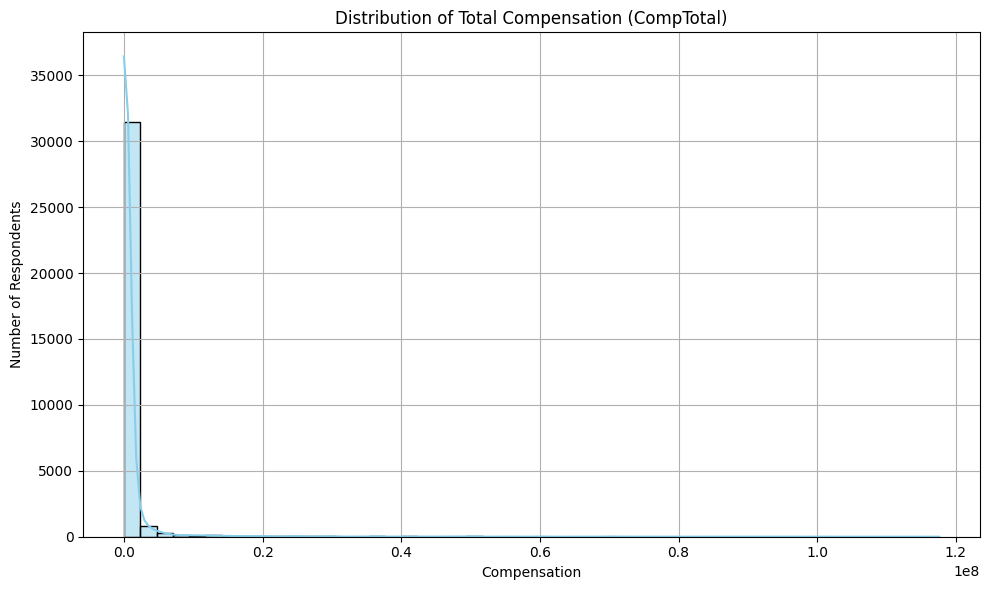

In [7]:
# Load the compensation data
q1 = f"SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL;"
df_hist = pd.read_sql_query(q1, conn)

# Optional: Filter out extreme outliers (e.g., top 1%)
df_filtered = df_hist[df_hist["CompTotal"] < df_hist["CompTotal"].quantile(0.99)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["CompTotal"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Total Compensation (CompTotal)")
plt.xlabel("Compensation")
plt.ylabel("Number of Respondents")
plt.grid(True)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


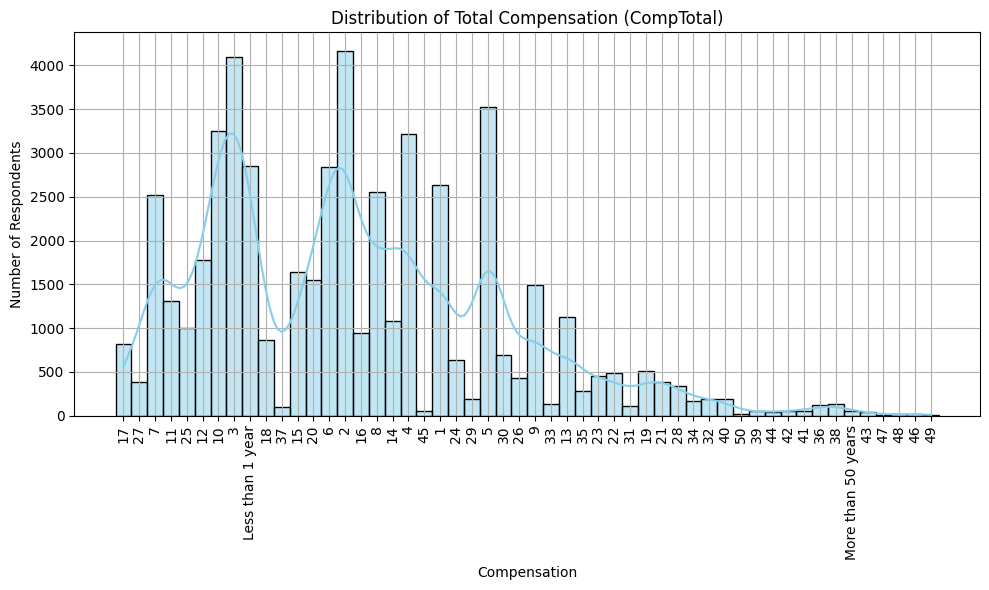

In [13]:
## Write your code here
q2 = """ SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL
"""
hist_df = pd.read_sql_query(q2, conn)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(hist_df["YearsCodePro"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Total Compensation (CompTotal)")
plt.xlabel("Compensation")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


C:\Users\HP\AppData\Local\Temp\ipykernel_17180\2463946201.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


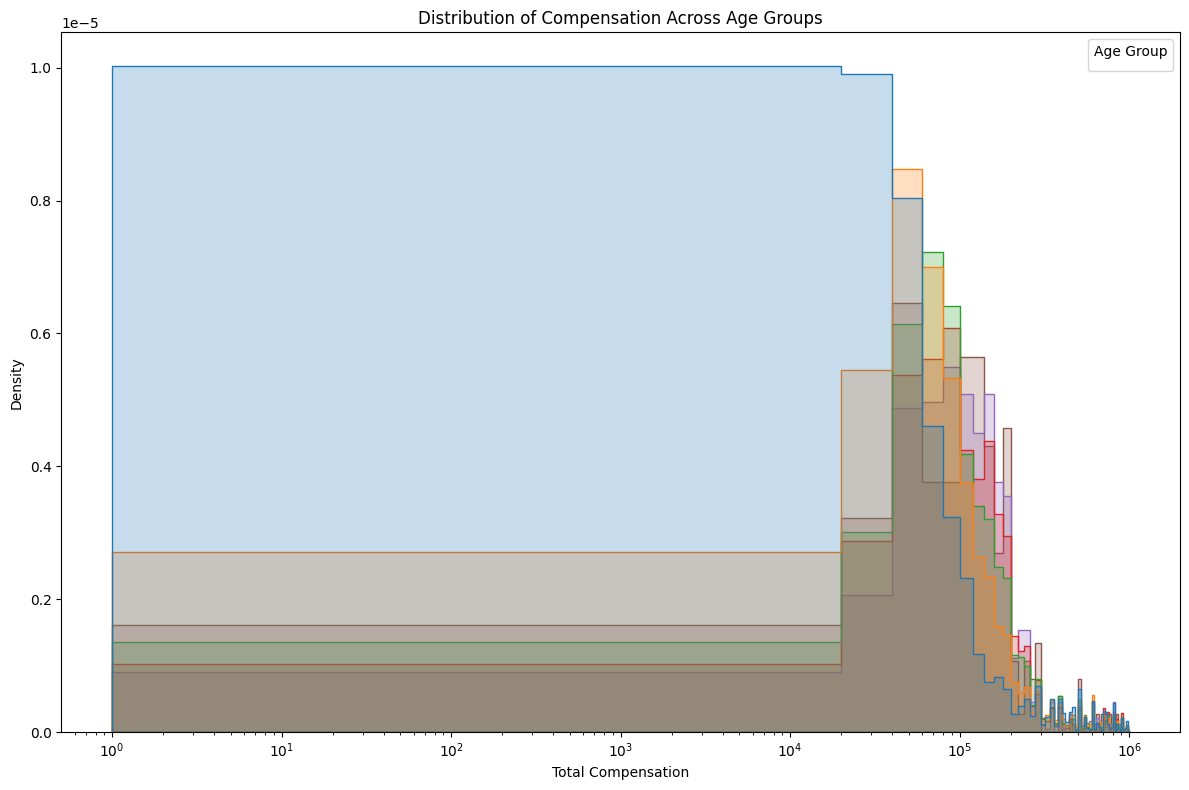

In [61]:
## Write your code here
q3 = """ SELECT CompTotal, Age FROM main WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df_hist = pd.read_sql_query(q3, conn)
# Define age bins and labels
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

# Map textual age ranges to approximate numeric midpoints
age_map = {
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df_hist['AgeNum'] = df_hist['Age'].map(age_map)

# Bin into age groups
df_hist['AgeGroup'] = pd.cut(df_hist['AgeNum'], bins=bins, labels=labels, right=False)

# Convert to numeric again just in case
df_hist['CompTotal'] = pd.to_numeric(df_hist['CompTotal'], errors='coerce')

# Filter out extreme values
df_hist = df_hist[(df_hist['CompTotal'] > 0) & (df_hist['CompTotal'] < 1_000_000)]



plt.figure(figsize=(12, 8))
sns.histplot(data=df_hist, x='CompTotal', hue='AgeGroup', element='step', stat='density', common_norm=False, bins=50)
plt.title('Distribution of Compensation Across Age Groups')
plt.xlabel('Total Compensation')
plt.ylabel('Density')
plt.xscale('log')  # Helps visualize skewed data
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


In [58]:
print(df_hist['CompTotal'].describe())
print(df_hist['CompTotal'].sort_values(ascending=False).head(10))


count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64
8262     1.000000e+150
19906     1.000000e+65
9929      1.000000e+53
5109      1.000000e+44
11579     8.000000e+27
14577     1.000000e+20
15957     1.111111e+15
29641     3.040302e+14
26850     7.587459e+13
32648     7.777778e+12
Name: CompTotal, dtype: float64


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [67]:
## Write your code here
q4 = """ SELECT TimeSearching, Age FROM main
"""
df = pd.read_sql_query(q4, conn)
df = df.dropna()
print(df.shape)
df.head()

(28911, 2)


,TimeSearching,Age
10,30-60 minutes a day,35-44 years old
12,30-60 minutes a day,35-44 years old
15,60-120 minutes a day,45-54 years old
18,15-30 minutes a day,25-34 years old
20,Less than 15 minutes a day,25-34 years old


In [69]:
df['TimeSearching'].unique()

array(['30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

<Axes: xlabel='TimeSearching_num', ylabel='AgeGroup'>

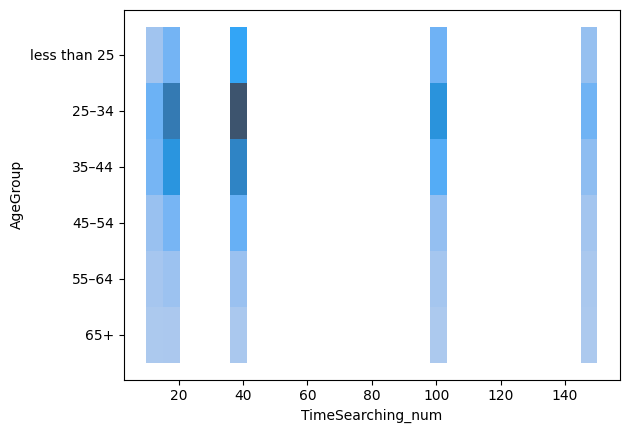

In [77]:
age_map = {
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
time_map = {
    '30-60 minutes a day': 40,
    '60-120 minutes a day': 100,
    '15-30 minutes a day': 20,
    'Less than 15 minutes a day': 10,
    'Over 120 minutes a day': 150
}
df['Age_num'] = df['Age'].map(age_map)
df['TimeSearching_num'] = df['TimeSearching'].map(time_map)

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['less than 25', '25–34', '35–44', '45–54', '55–64', '65+']
df['AgeGroup'] = pd.cut(df['Age_num'], bins=bins, labels=labels, right=False)

sns.histplot(data=df, y= 'AgeGroup', x='TimeSearching_num')

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [ ]:
## Write your code here

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [ ]:
## Write your code here

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [ ]:
## Write your code here

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [78]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
